In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/comprehensive_df.csv', index_col=0)

In [12]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
                              index_col=0)

In [14]:
df = df.loc[[x for x in list(df.index) if x in list(patient_affinitiesI.index)]]

In [15]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,...,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,GZMA,PRF1,Cytolytic,CD4/CD8 Ratio
TCGA-DJ-A13L,0.158153,0.075639,THCA,85.0,WHITE,0.0,1.0,1.0,0.161184,0.104167,...,0.0,0.0000,0.0,0.06,0.132262,1.030747,803,562,671.778237,2.303335
TCGA-KO-8405,0.160118,0.075639,KICH,29.0,WHITE,0.0,0.0,0.0,0.174342,0.104167,...,0.0,0.0000,0.0,0.00,0.326648,0.954581,442,470,455.785037,40.249152
TCGA-77-8154,0.157171,0.059921,LUSC,67.0,NaN,0.0,2.0,2.0,0.150219,0.096491,...,0.0,0.0000,0.0,0.04,0.158431,1.035869,47,65,55.272054,5.099648
TCGA-37-4130,0.183694,0.057957,LUSC,56.0,WHITE,1.0,1.0,2.0,0.176535,0.099781,...,0.0,0.0000,0.0,0.03,0.185014,1.018260,7547,4186,5620.653165,0.426280
TCGA-P8-A5KD,0.182711,0.072692,PCPG,NaN,WHITE,0.0,0.0,0.0,0.182018,0.099781,...,0.0,0.0005,0.0,0.46,0.017106,1.075191,109,123,115.788600,2.682090


In [22]:
tissues = list(df.Tissue.value_counts()[:17].index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

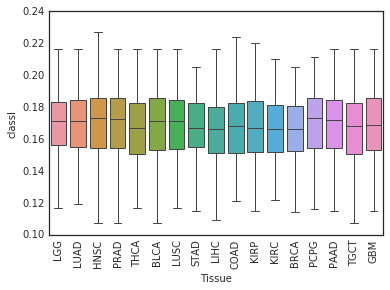

In [28]:
sns.boxplot(x='Tissue', y='classI', data=df, order=tissues)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

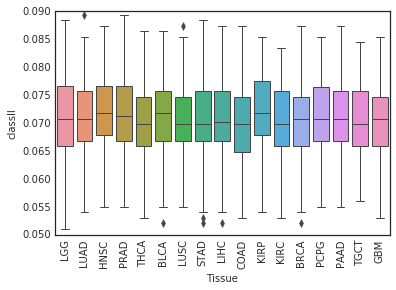

In [29]:
sns.boxplot(x='Tissue', y='classII', data=df, order=tissues)
plt.xticks(rotation=90)

In [27]:
for tissue in tissues:
    print tissue, 'classI', sp.mannwhitneyu(df[df.Tissue == tissue].classI, df[df.Tissue != tissue].classI)
    print tissue, 'classII', sp.mannwhitneyu(df[df.Tissue == tissue].classII, df[df.Tissue != tissue].classII)

LGG classI MannwhitneyuResult(statistic=795668.0, pvalue=0.11224368960226283)
LGG classII MannwhitneyuResult(statistic=821965.0, pvalue=0.42481529862120049)
LUAD classI MannwhitneyuResult(statistic=784415.0, pvalue=0.15031847007969201)
LUAD classII MannwhitneyuResult(statistic=806471.0, pvalue=0.43376536957591216)
HNSC classI MannwhitneyuResult(statistic=738110.5, pvalue=0.032027617290631721)
HNSC classII MannwhitneyuResult(statistic=727373.5, pvalue=0.011197298643479164)
PRAD classI MannwhitneyuResult(statistic=746935.0, pvalue=0.07794344521971612)
PRAD classII MannwhitneyuResult(statistic=740906.0, pvalue=0.04824024294019142)
THCA classI MannwhitneyuResult(statistic=716665.0, pvalue=0.039295013469942651)
THCA classII MannwhitneyuResult(statistic=722017.0, pvalue=0.06145929972515804)
BLCA classI MannwhitneyuResult(statistic=659803.0, pvalue=0.25227940389438197)
BLCA classII MannwhitneyuResult(statistic=666654.5, pvalue=0.35491675644837239)
LUSC classI MannwhitneyuResult(statistic=6260